Matplotlib is building the font cache; this may take a moment.


Dataset shape: (151112, 11)

Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

First 5 rows:
=== Dataset Information ===
Total records: 151,112
Number of features: 11
Memory usage: 63.81 MB
=== Missing Values ===
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
Duplicate rows: 0
=== Data Types ===
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object
=== Target Variable Distribution ===
        Count  Percentage
class                    
0      136961   90.635423
1       14151    9.364577


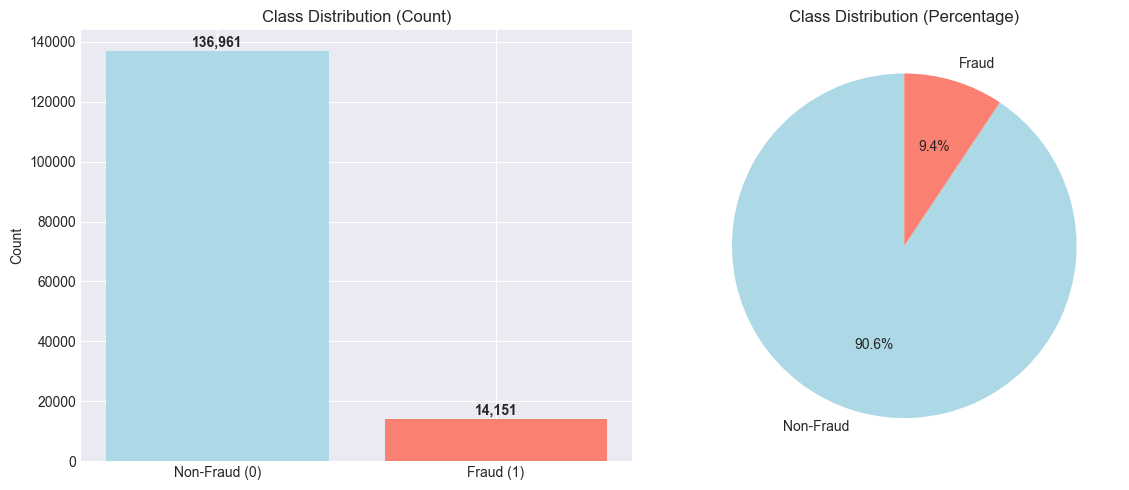

=== Numerical Features Summary ===
       purchase_value            age
count   151112.000000  151112.000000
mean        36.935372      33.140704
std         18.322762       8.617733
min          9.000000      18.000000
25%         22.000000      27.000000
50%         35.000000      33.000000
75%         49.000000      39.000000
max        154.000000      76.000000


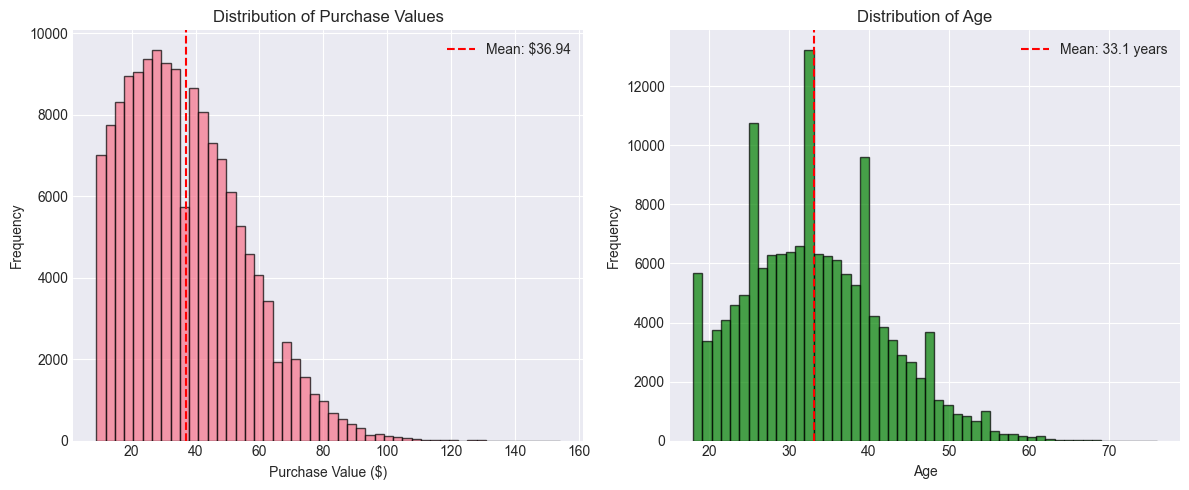

=== Categorical Features ===

SOURCE:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64


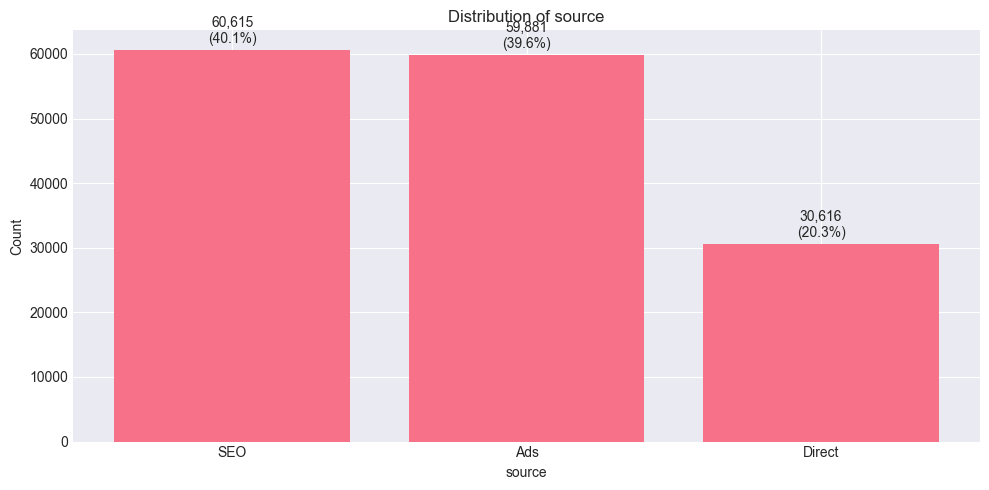


BROWSER:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64


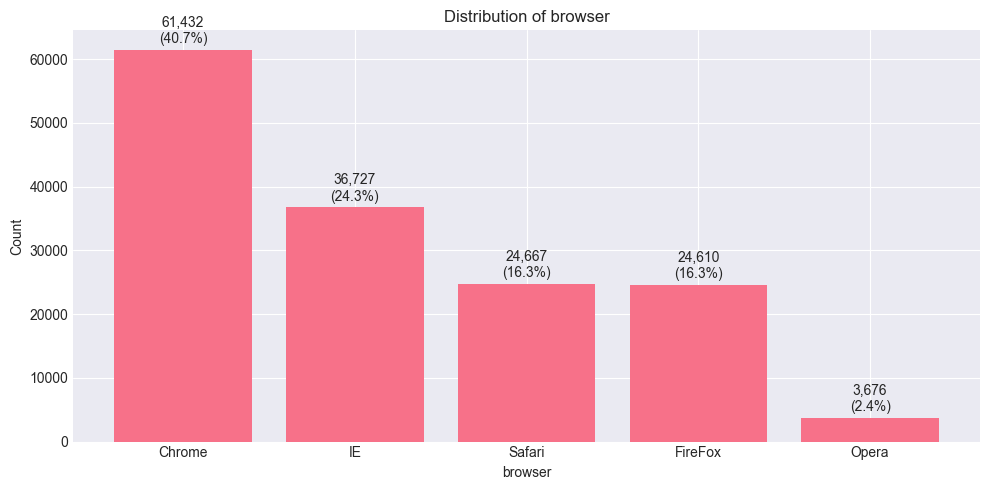


SEX:
sex
M    88293
F    62819
Name: count, dtype: int64


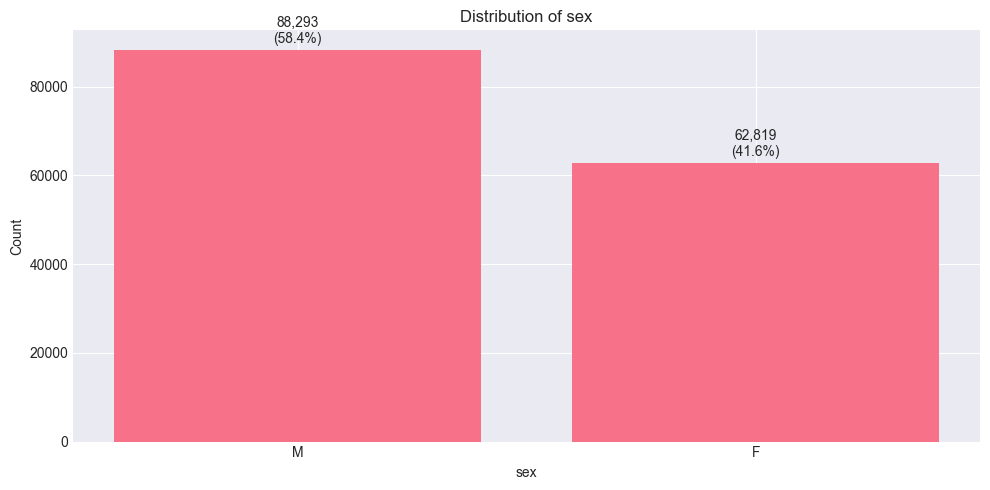

=== Time Analysis ===


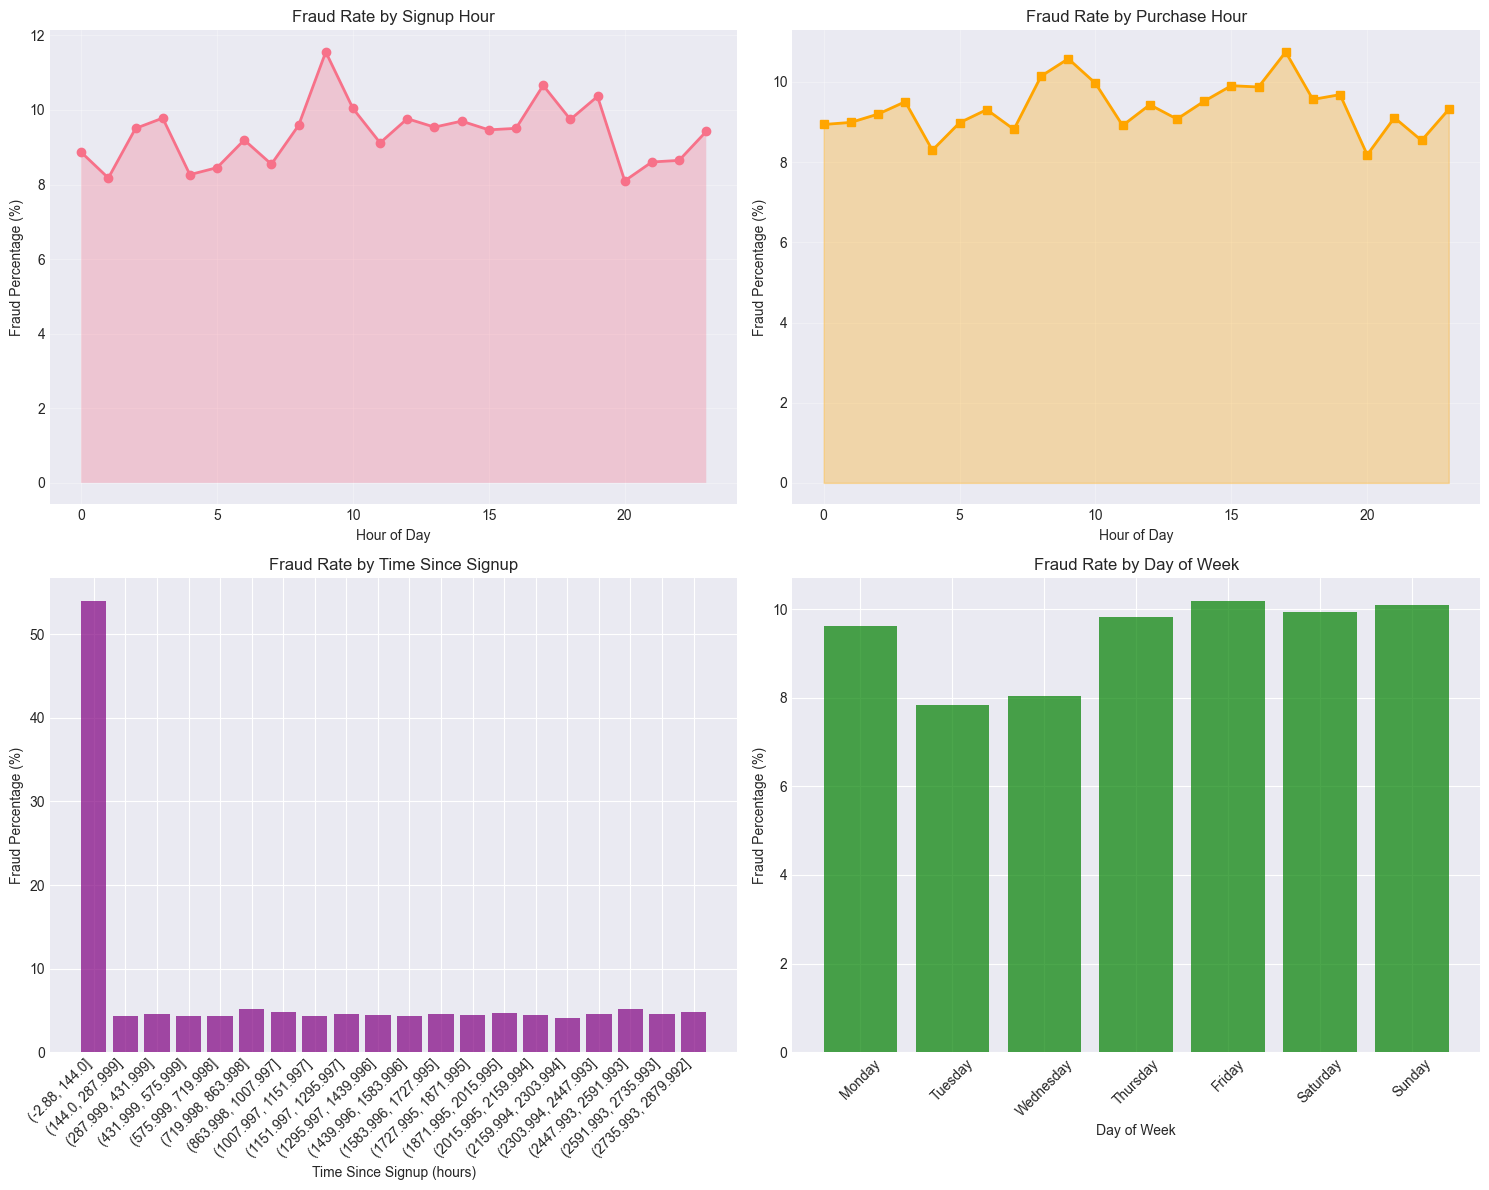

=== Correlation Matrix ===


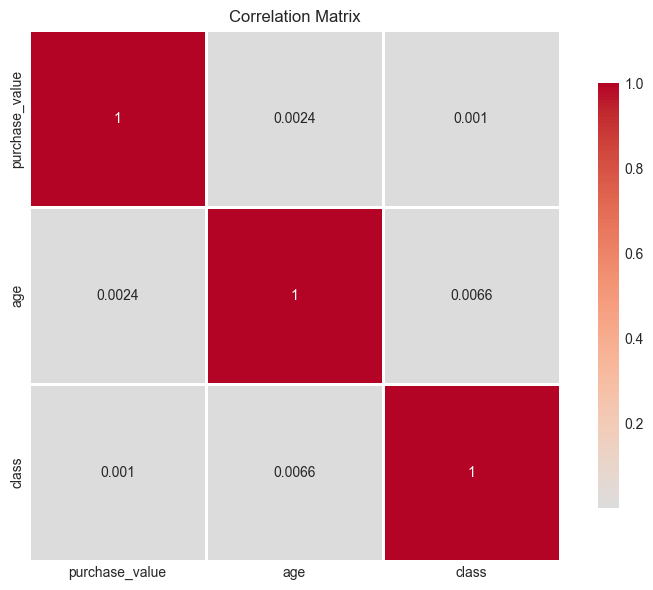

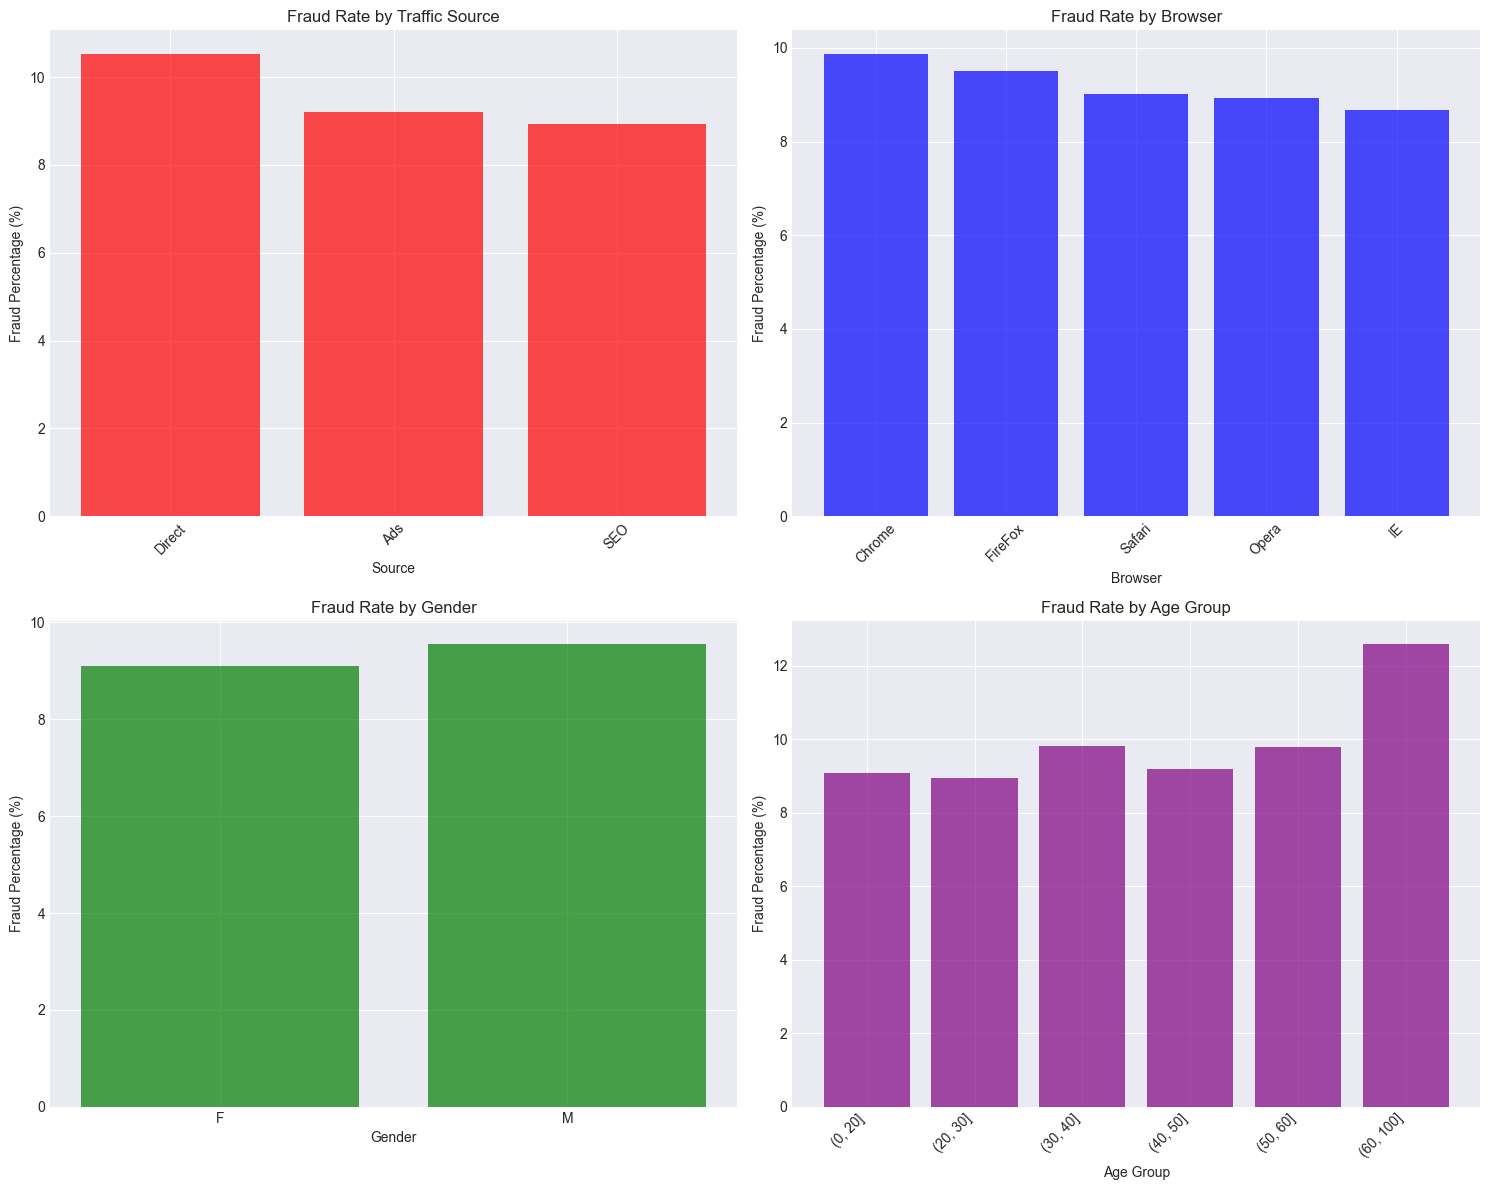

Cleaned data saved to '../data/processed/fraud_data_cleaned.csv'

=== Key Insights ===
1. Class Imbalance: 9.36% fraud vs 90.64% non-fraud
2. Average purchase value: $36.94
3. Average age: 33.1 years
4. Most common source: SEO
5. Most common browser: Chrome
6. Average time from signup to purchase: 1370.01 hours


In [1]:
# %% [markdown]
# # E-commerce Fraud Data Analysis
# This notebook explores the e-commerce transaction dataset (Fraud_Data.csv)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ipaddress
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# %%
# Load the data
fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
print("Dataset shape:", fraud_data.shape)
print("\nColumns:", fraud_data.columns.tolist())
print("\nFirst 5 rows:")
fraud_data.head()

# %%
# Basic info
print("=== Dataset Information ===")
print(f"Total records: {len(fraud_data):,}")
print(f"Number of features: {fraud_data.shape[1]}")
print(f"Memory usage: {fraud_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# %%
# Check for missing values
print("=== Missing Values ===")
missing = fraud_data.isnull().sum()
missing_percent = (missing / len(fraud_data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# %%
# Check for duplicates
duplicates = fraud_data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# %%
# Data types
print("=== Data Types ===")
print(fraud_data.dtypes)

# %%
# Convert timestamp columns
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# %%
# Target variable analysis
print("=== Target Variable Distribution ===")
class_dist = fraud_data['class'].value_counts()
class_percent = fraud_data['class'].value_counts(normalize=True) * 100

class_df = pd.DataFrame({
    'Count': class_dist,
    'Percentage': class_percent
})
print(class_df)

# %%
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
axes[0].bar(['Non-Fraud (0)', 'Fraud (1)'], class_dist.values, 
            color=['lightblue', 'salmon'])
axes[0].set_title('Class Distribution (Count)')
axes[0].set_ylabel('Count')

# Add count labels
for i, v in enumerate(class_dist.values):
    axes[0].text(i, v + max(class_dist.values)*0.01, 
                f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(class_dist.values, labels=['Non-Fraud', 'Fraud'], 
           autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.savefig('../notebooks/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Numerical features analysis
print("=== Numerical Features Summary ===")
numerical_cols = ['purchase_value', 'age']
print(fraud_data[numerical_cols].describe())

# %%
# Visualize numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Purchase value distribution
axes[0].hist(fraud_data['purchase_value'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Purchase Value ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Purchase Values')
axes[0].axvline(fraud_data['purchase_value'].mean(), color='red', 
                linestyle='--', label=f'Mean: ${fraud_data["purchase_value"].mean():.2f}')
axes[0].legend()

# Age distribution
axes[1].hist(fraud_data['age'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Age')
axes[1].axvline(fraud_data['age'].mean(), color='red', linestyle='--', 
                label=f'Mean: {fraud_data["age"].mean():.1f} years')
axes[1].legend()

plt.tight_layout()
plt.savefig('../notebooks/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Categorical features analysis
categorical_cols = ['source', 'browser', 'sex']

print("=== Categorical Features ===")
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    value_counts = fraud_data[col].value_counts()
    print(value_counts)
    
    # Visualize
    plt.figure(figsize=(10, 5))
    bars = plt.bar(value_counts.index.astype(str), value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add percentage labels
    total = len(fraud_data)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values)*0.01,
                f'{height:,}\n({height/total*100:.1f}%)', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig(f'../notebooks/{col}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# %%
# Time-based analysis
print("=== Time Analysis ===")

# Extract time features
fraud_data['signup_hour'] = fraud_data['signup_time'].dt.hour
fraud_data['signup_day'] = fraud_data['signup_time'].dt.dayofweek
fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['purchase_day'] = fraud_data['purchase_time'].dt.dayofweek
fraud_data['signup_to_purchase_hours'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600

# Analyze fraud by hour
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Fraud by signup hour
fraud_by_signup_hour = fraud_data.groupby('signup_hour')['class'].mean() * 100
axes[0,0].plot(fraud_by_signup_hour.index, fraud_by_signup_hour.values, 
               marker='o', linewidth=2)
axes[0,0].fill_between(fraud_by_signup_hour.index, fraud_by_signup_hour.values, alpha=0.3)
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Fraud Percentage (%)')
axes[0,0].set_title('Fraud Rate by Signup Hour')
axes[0,0].grid(True, alpha=0.3)

# Fraud by purchase hour
fraud_by_purchase_hour = fraud_data.groupby('purchase_hour')['class'].mean() * 100
axes[0,1].plot(fraud_by_purchase_hour.index, fraud_by_purchase_hour.values, 
               marker='s', linewidth=2, color='orange')
axes[0,1].fill_between(fraud_by_purchase_hour.index, fraud_by_purchase_hour.values, 
                       alpha=0.3, color='orange')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Fraud Percentage (%)')
axes[0,1].set_title('Fraud Rate by Purchase Hour')
axes[0,1].grid(True, alpha=0.3)

# Time between signup and purchase
fraud_data['signup_to_purchase_bins'] = pd.cut(fraud_data['signup_to_purchase_hours'], 
                                               bins=20)
fraud_by_time_between = fraud_data.groupby('signup_to_purchase_bins')['class'].mean() * 100
axes[1,0].bar(range(len(fraud_by_time_between)), fraud_by_time_between.values, 
              color='purple', alpha=0.7)
axes[1,0].set_xlabel('Time Since Signup (hours)')
axes[1,0].set_ylabel('Fraud Percentage (%)')
axes[1,0].set_title('Fraud Rate by Time Since Signup')
axes[1,0].set_xticks(range(len(fraud_by_time_between)))
axes[1,0].set_xticklabels([str(bin_) for bin_ in fraud_by_time_between.index], 
                          rotation=45, ha='right')

# Fraud by day of week
fraud_by_day = fraud_data.groupby('purchase_day')['class'].mean() * 100
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[1,1].bar(days, fraud_by_day.values, color='green', alpha=0.7)
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Fraud Percentage (%)')
axes[1,1].set_title('Fraud Rate by Day of Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../notebooks/time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Correlation analysis (for numerical features only)
print("=== Correlation Matrix ===")
correlation_matrix = fraud_data[['purchase_value', 'age', 'class']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../notebooks/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Fraud patterns by categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Fraud by source
fraud_by_source = fraud_data.groupby('source')['class'].agg(['mean', 'count'])
fraud_by_source = fraud_by_source.sort_values('mean', ascending=False)
axes[0,0].bar(fraud_by_source.index, fraud_by_source['mean'] * 100, color='red', alpha=0.7)
axes[0,0].set_xlabel('Source')
axes[0,0].set_ylabel('Fraud Percentage (%)')
axes[0,0].set_title('Fraud Rate by Traffic Source')
axes[0,0].tick_params(axis='x', rotation=45)

# Fraud by browser
fraud_by_browser = fraud_data.groupby('browser')['class'].agg(['mean', 'count'])
fraud_by_browser = fraud_by_browser.sort_values('mean', ascending=False)
axes[0,1].bar(fraud_by_browser.index, fraud_by_browser['mean'] * 100, color='blue', alpha=0.7)
axes[0,1].set_xlabel('Browser')
axes[0,1].set_ylabel('Fraud Percentage (%)')
axes[0,1].set_title('Fraud Rate by Browser')
axes[0,1].tick_params(axis='x', rotation=45)

# Fraud by gender
fraud_by_gender = fraud_data.groupby('sex')['class'].agg(['mean', 'count'])
axes[1,0].bar(fraud_by_gender.index, fraud_by_gender['mean'] * 100, color='green', alpha=0.7)
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Fraud Percentage (%)')
axes[1,0].set_title('Fraud Rate by Gender')

# Fraud by age group
fraud_data['age_group'] = pd.cut(fraud_data['age'], bins=[0, 20, 30, 40, 50, 60, 100])
fraud_by_age_group = fraud_data.groupby('age_group')['class'].mean() * 100
axes[1,1].bar(range(len(fraud_by_age_group)), fraud_by_age_group.values, 
              color='purple', alpha=0.7)
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('Fraud Percentage (%)')
axes[1,1].set_title('Fraud Rate by Age Group')
axes[1,1].set_xticks(range(len(fraud_by_age_group)))
axes[1,1].set_xticklabels([str(age_group) for age_group in fraud_by_age_group.index], 
                          rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../notebooks/categorical_fraud_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Save processed data for feature engineering
fraud_data.to_csv('../data/processed/fraud_data_cleaned.csv', index=False)
print("Cleaned data saved to '../data/processed/fraud_data_cleaned.csv'")

# %%
# Summary statistics
print("\n=== Key Insights ===")
print(f"1. Class Imbalance: {class_percent[1]:.2f}% fraud vs {class_percent[0]:.2f}% non-fraud")
print(f"2. Average purchase value: ${fraud_data['purchase_value'].mean():.2f}")
print(f"3. Average age: {fraud_data['age'].mean():.1f} years")
print(f"4. Most common source: {fraud_data['source'].mode()[0]}")
print(f"5. Most common browser: {fraud_data['browser'].mode()[0]}")
print(f"6. Average time from signup to purchase: {fraud_data['signup_to_purchase_hours'].mean():.2f} hours")